# Упражнение на графах

**Дано**: [набор данных](https://drive.google.com/open?id=1O5pFvZEzzAk3B4GIaVHYiMM8fm4VNw2L), извлечённых из 4000 разных функций, скомпилированных двумя разными компиляторами (clang и gcc).

**Задача**: обучить классификатор угадывать какой из двух компиляторов использовался для компиляции каждой конкретной функции. Описать качество полученного классификатора (или классификаторов).

## Подробности

Каждая функция представлена [графом потока управления](https://ru.wikipedia.org/wiki/Граф_потока_управления) (control-flow graph). С каждой вершиной ассоциирован набор признаков, полученный из ассемблерных инструкций как мешок слов (multiple-hot encoding). Каждый граф сохранён в отдельный файл в формате `pickle` и легко загружается с помощью `networkx.read_gpickle`.

Тип компилятора определяется по имени файла: `is_gcc = '-gcc-' in filename`. Остальная часть имени файла для задачи не релевантна.

Для решения задачи можно пользоваться абсолютно любыми инструментами. Способность быстро осваивать новые инструменты является для нашей работы большим преимуществом.

Решение можно присылать в любом виде.

## Рекомендации

Для решения такой задачи вероятно хорошо будут работать графовые свёрточные сети, например, такая: https://arxiv.org/abs/1609.02907 . При этом мы не обещаем, что полное игнорирование графовой информации ухудшит решение.

Для решения задачи разрешено пользоваться любыми доступными готовыми решениями.

Например, ниже приведён (крайне куцый и почти бесполезный) пример конвертации графа из `networkx` в формат данных `torch_geometric`.

Мы оцениваем то, *как* вы решали не в меньшей мере, чем то, каких результатов вы достигли.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
path = "./data/"
filename = path + 'graph-000000139945-ffmpeg-clang-asan-O3_g.dot-ff_j_rev_dct2.pickle'

In [3]:
is_gcc = '-gcc-' in filename
is_clang = '-clang-' in filename
print('Compiled by', 'gcc' * is_gcc + 'clang' * is_clang)

Compiled by clang


In [4]:
g = nx.read_gpickle(filename)

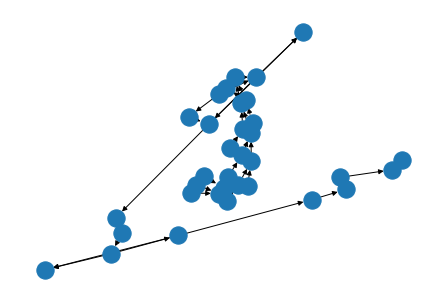

In [5]:
nx.draw(g)

In [6]:
g.nodes

NodeView((23638208, 25000704, 25000736, 25000765, 25000797, 25000827, 25000846, 25000886, 25000918, 25000943, 25000960, 25000976, 25000984, 25001002, 25001010, 25001028, 25001036, 25001053, 25001058, 25001074, 25001082, 25001099, 25001107, 25001124, 25001132, 25001148, 25001153, 25001168, 25001186, 25001200, 25001212, 25001217, 25001232, 25001254))

In [7]:
np.array(g.nodes[23638208]['features'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
import torch_geometric

In [9]:
d = torch_geometric.utils.from_networkx(g)

In [10]:
d.features.shape

torch.Size([34, 702])

In [ ]:
class DumbModel:

      def fit(...):
        pass

      def predict(data: np.ndarray):
        return np.zeros((data.shape[0], ))